# Pymaceuticals Inc.
---

### Analysis
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_merged_data = pd.merge(mouse_metadata, study_results, how='right')

# Combine the data into a single DataFrame
mouse_merged_data = mouse_merged_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]


# Display the data table for preview
mouse_merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = mouse_merged_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = mouse_merged_data.loc[mouse_merged_data.duplicated,'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = mouse_merged_data.loc[mouse_merged_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_merged_data[mouse_merged_data['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_mouse_data['Mouse ID'].nunique()
num_clean_mice


248

## Summary Statistics

In [7]:
# List of columns to include in the summary DataFrame
# Group by "Drug Regimen"
grouped_by_drug = clean_mouse_data.groupby('Drug Regimen')

# Create empty dictionaries to store summary statistics
mean_tumor_volume = {}
median_tumor_volume = {}
variance_tumor_volume = {}
std_tumor_volume = {}
sem_tumor_volume = {}

# Loop through each group
for drug, group_data in grouped_by_drug:
    # Calculate summary statistics for each drug regimen
    mean_tumor_volume[drug] = group_data['Tumor Volume (mm3)'].mean()
    median_tumor_volume[drug] = group_data['Tumor Volume (mm3)'].median()
    variance_tumor_volume[drug] = group_data['Tumor Volume (mm3)'].var()
    std_tumor_volume[drug] = group_data['Tumor Volume (mm3)'].std()
    sem_tumor_volume[drug] = group_data['Tumor Volume (mm3)'].sem()  


# Create a DataFrame with the summary statistics
summary_stat_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance Tumor Volume': variance_tumor_volume,
    'Std Dev Tumor Volume': std_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

summary_stat_df.index.name = "Drug Regimen"


summary_stat_df



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean=pd.Series.mean,
    Median=pd.Series.median,
    VAR=pd.Series.var,
    STD=pd.Series.std,
    SEM=pd.Series.sem)

agg_df

,Mean,Median,VAR,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

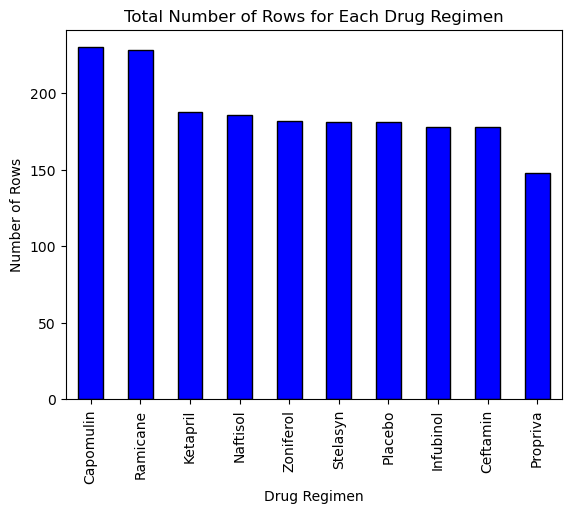

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_mouse_data['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.show()

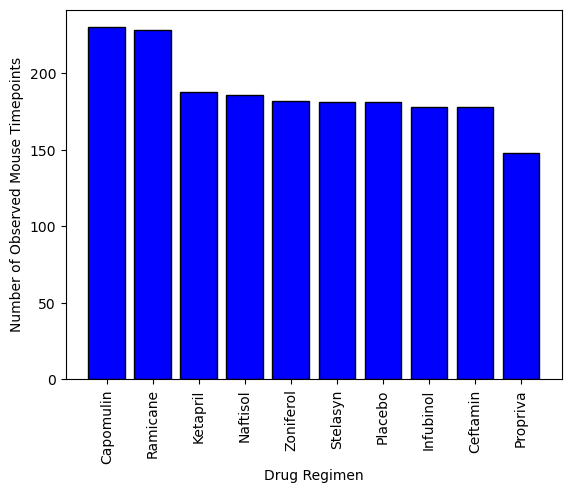

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Assuming clean_mouse_data is your DataFrame containing the data
drug_regimen_counts = clean_mouse_data['Drug Regimen'].value_counts()

# Create a bar plot
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.xticks(rotation=90)


# Show the plot
plt.show()

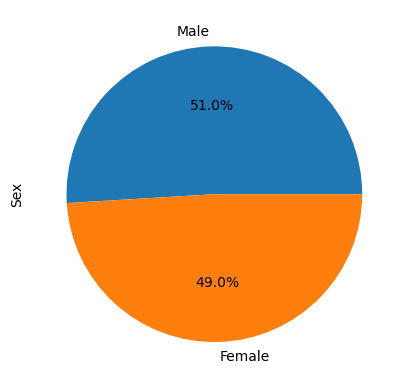

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_counts = clean_mouse_data['Sex'].value_counts()
mouse_sex_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')


plt.show()

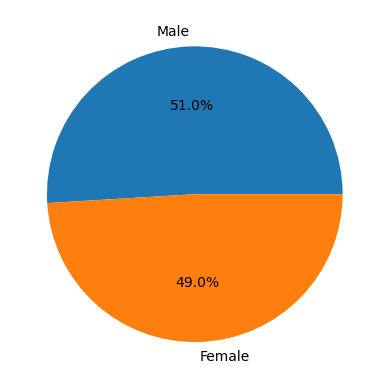

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_counts = clean_mouse_data['Sex'].value_counts()
plt.pie(mouse_sex_counts, labels=mouse_sex_counts.index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
grouped_by_mouse = clean_mouse_data.groupby('Mouse ID')['Timepoint'].max()
grouped_by_mouse = grouped_by_mouse.reset_index()
grouped_by_mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_vol_df = grouped_by_mouse.merge(clean_mouse_data,on = ['Mouse ID', 'Timepoint'], how='left') 
final_vol_df.head()







,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
    final_tumor_vol = final_vol_df.loc[final_vol_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    tumor_vol_data.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    low_quartile = quartiles[0.25]
    med_quartile = quartiles[0.5]
    up_quartile = quartiles[0.75]
    intquartile_range = up_quartile - low_quartile
    up_bound = up_quartile+1.5*intquartile_range 
    low_bound = low_quartile-1.5*intquartile_range 
    outliers = final_tumor_vol.loc[(final_tumor_vol < low_quartile) | (final_tumor_vol > up_quartile)] 
    print(f"The drug regimen {drug} has outliers, which are: {outliers}" )

#INTERQUARTILE RANGE, LOW QT, UPPER QT, LOW BOUND, UPPER BOUND, QUARTILES TOGETHER 
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


The drug regimen Capomulin has outliers, which are: 61     30.485985
80     47.685963
108    41.483008
121    28.430964
162    46.539206
169    41.581521
174    23.343598
180    40.728578
192    31.023923
204    40.658124
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64
The drug regimen Ramicane has outliers, which are: 7      43.047543
70     29.128472
96     22.050126
119    30.564625
126    31.095335
157    45.220869
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64
The drug regimen Infubinol has outliers, which are: 0      67.973419
13     66.083066
27     72.226731
31     36.321346
78     67.289621
97     66.196912
123    47.010364
142    45.699331
197    46.250112
202    51.542431
211    50.005138
233    67.685569
Name: Tumor Volume (mm3), dtype: float64
The drug regimen Ceftamin has outliers, which are: 21     45.000000
75     47.784682
94     68.923185
106    6

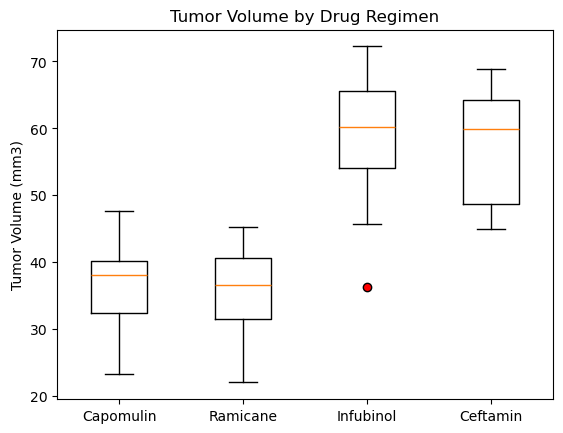

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=drug_list, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Tumor Volume by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

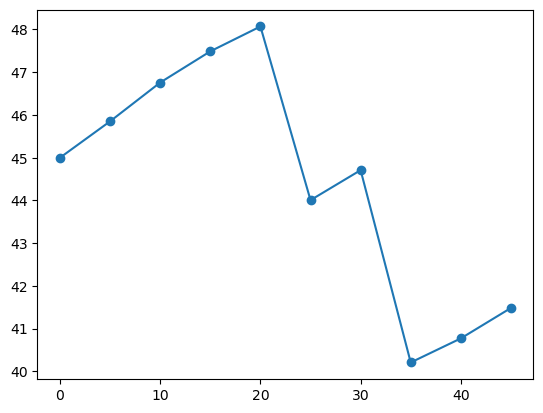

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_capomulin_mouse = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "l509",:]

plt.plot(single_capomulin_mouse['Timepoint'], single_capomulin_mouse['Tumor Volume (mm3)'], marker='o')
plt.show()


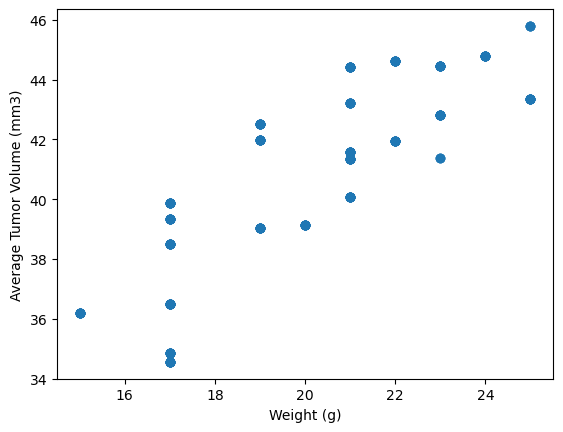

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for 'Capomulin'
all_capomulin_mice = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin", :]

mean_tumor_volume_per_mouse = all_capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

weight_vs_volume = pd.merge(mean_tumor_volume_per_mouse, all_capomulin_mice[['Mouse ID', 'Weight (g)']], on='Mouse ID')

plt.scatter(weight_vs_volume['Weight (g)'], weight_vs_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8343958614425967


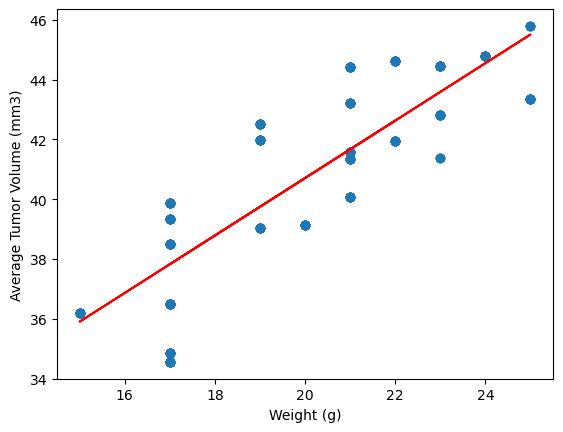

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight_vs_volume['Weight (g)'], weight_vs_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate correlation coefficient
correlation_coefficient, _ = pearsonr(weight_vs_volume['Weight (g)'], weight_vs_volume['Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(weight_vs_volume['Weight (g)'], weight_vs_volume['Tumor Volume (mm3)'])

# Plot the regression line
plt.plot(weight_vs_volume['Weight (g)'], intercept + slope * weight_vs_volume['Weight (g)'], color='red', label='Regression Line')
plt.show()
